In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [4]:
train.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [5]:
#lets Check the Test Data
test.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info


In [246]:
#EDA

In [6]:
#Lets see the shape of train data

train.shape

(10683, 11)

**It shows that the train dataset has 10683 rows and 11 columns in it**

In [7]:
#Lets see the shape of test data
test.shape

(2671, 10)

**It shows that the test dataset has 2671 rows and 10 columns in it**

In [10]:
train.describe() #Lets see how the train data is distributed

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
train.isnull().sum() #with it we found that there is no null values in it.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [3]:
train = train.dropna(axis=0) #Dropping rows with na values in it

In [12]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [4]:
test = test.dropna(axis=0) #Dropping rows with na values from the test set.

In [5]:
#Contatenating both the sets for further analysis.
train['source'] = 'train'
test['source'] = 'test'
df= pd.concat([train,test])

In [67]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


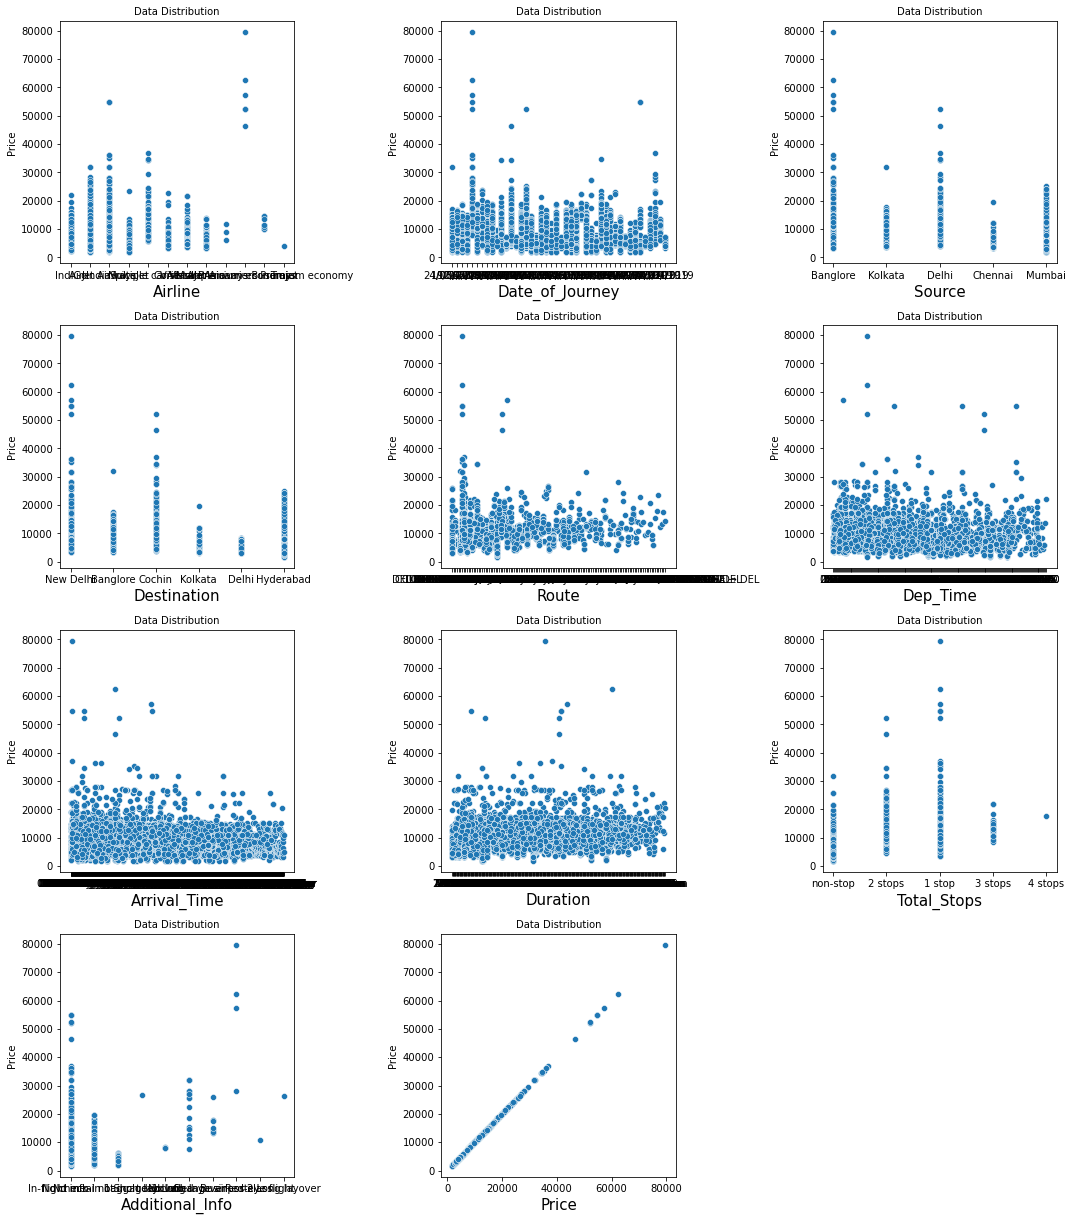

In [30]:
#Plotting scatter plot to see the relation of features with label

plt.figure(figsize = [15,25])
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(6,3,plotnumber)
        sns.scatterplot(x = df[column], y= df['Price'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

**We saw that price has either negative relation with the features or little bit of possitive**

In [7]:
df['source'].replace({'train':0}, inplace=True)

In [8]:
df['source'].replace({'test':1}, inplace =True)

In [9]:
df['source'].value_counts()

0    10682
1     2671
Name: source, dtype: int64

In [10]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,3,24,0,5,18,211,264,242,4,8,3897.0,0
1,1,6,3,0,87,31,986,342,1,8,7662.0,0


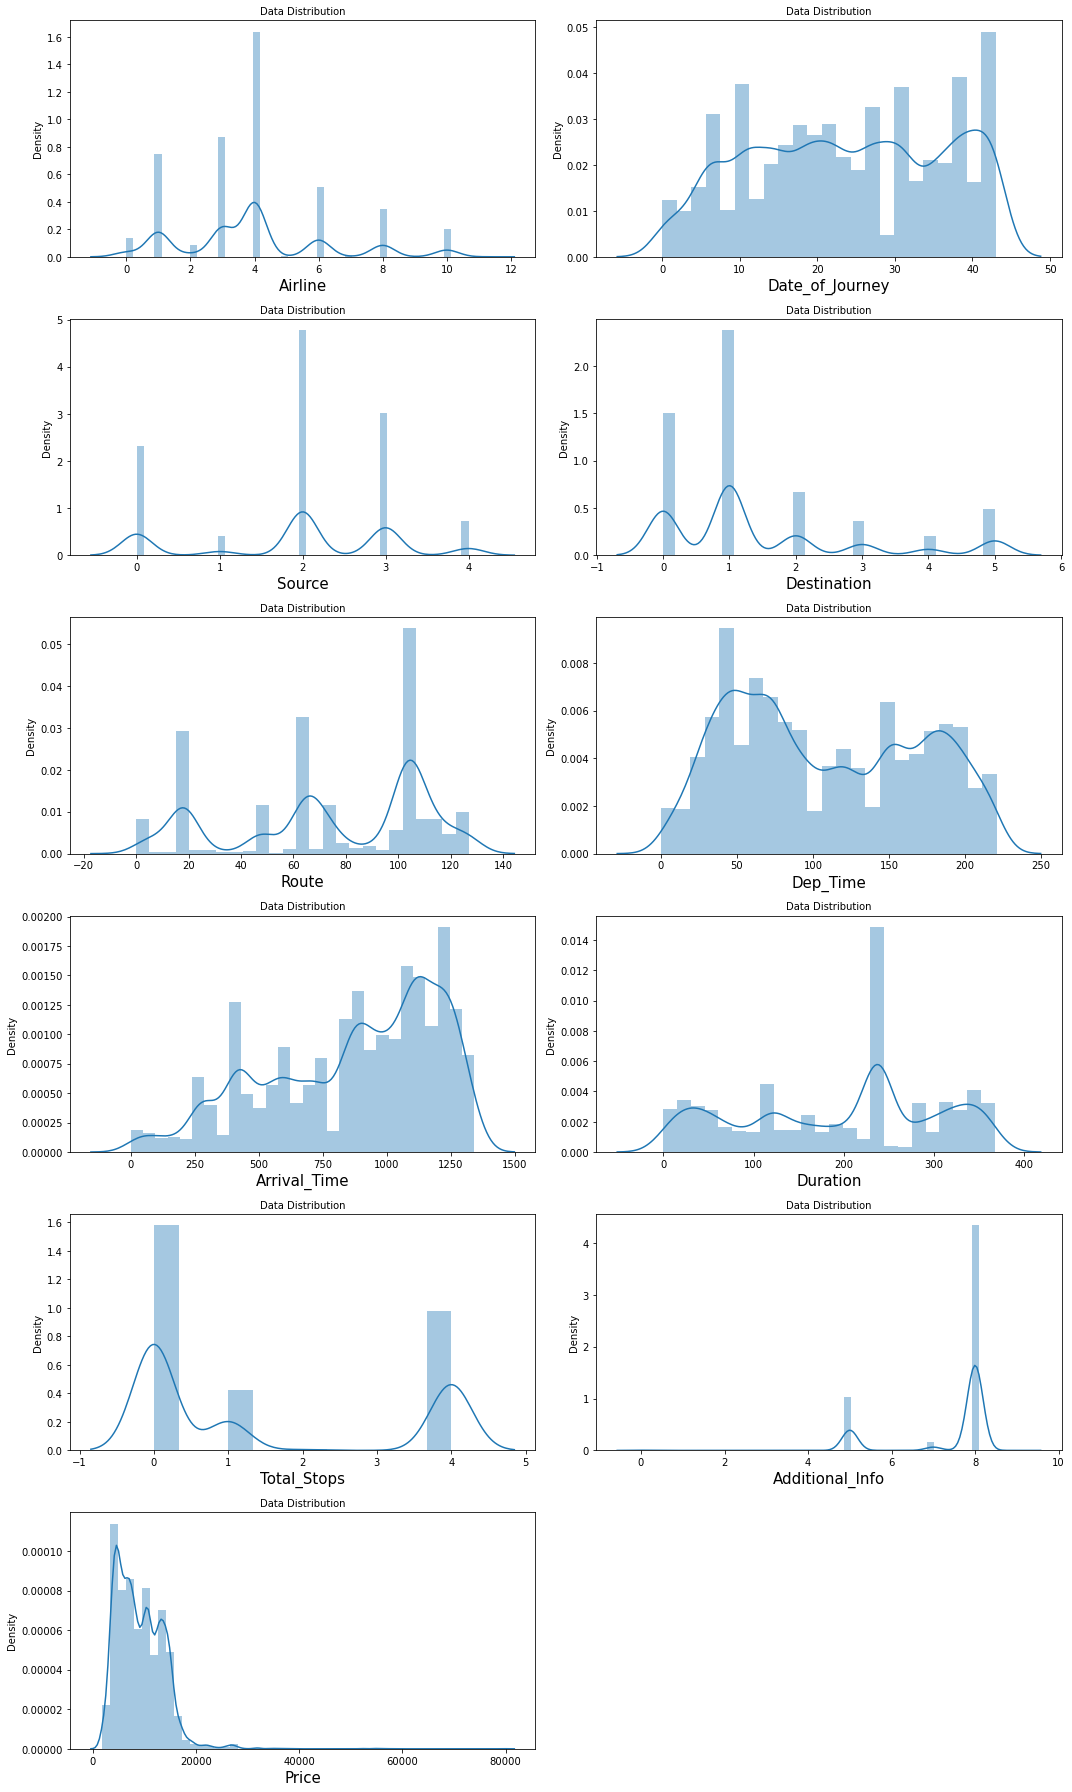

In [15]:
#Plotting scatter plot to see the relation of features with label

plt.figure(figsize = [15,25])
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(x = df[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [16]:
df.skew()

Airline            0.731057
Date_of_Journey   -0.070718
Source            -0.424023
Destination        1.244046
Route             -0.501911
Dep_Time           0.194914
Arrival_Time      -0.606676
Duration          -0.213498
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
source             0.000000
dtype: float64

**It shows there is not much skewness in the dataset and most of them are categorical hence removing skewness is not required**

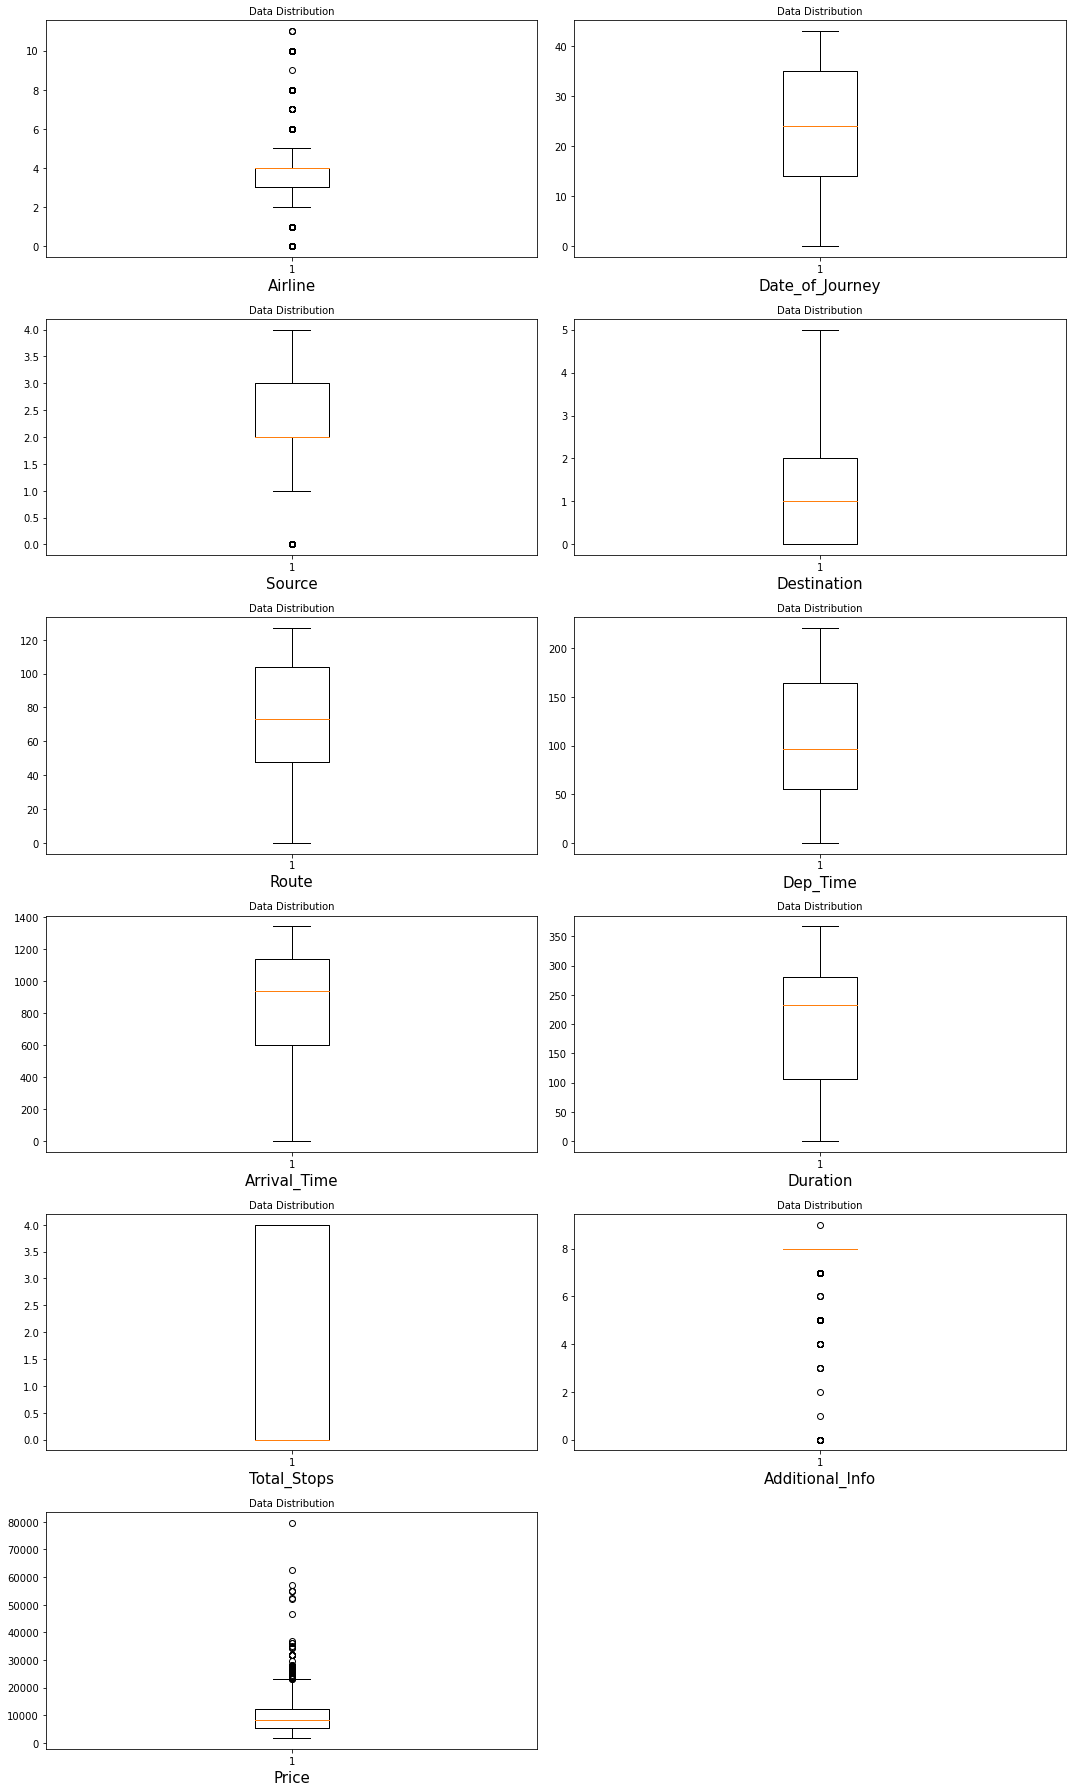

In [20]:
#Checking for outliers in the dataset.

plt.figure(figsize = [15,25])
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(6,2,plotnumber)
        plt.boxplot(x = df[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

**There are outliers but very less in the entire dataset which we will remove**

In [198]:
#Now will check the collinearity between the features with the help of heatmap.

In [74]:
corr_mat = df.corr()
corr_mat

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
Airline,1.000000,0.021282,-0.018545,0.022104,0.020584,-0.030418,-0.018441,0.028329,0.038171,-0.058490,-0.039565,0.009394
Date_of_Journey,0.021282,1.000000,0.163331,-0.270737,0.270219,-0.010970,-0.011631,-0.002365,-0.043656,0.013253,-0.036907,-0.002298
Source,-0.018545,0.163331,1.000000,-0.589711,0.410152,0.054035,0.016781,-0.185233,-0.223097,-0.022221,0.015999,0.003116
Destination,0.022104,-0.270737,-0.589711,1.000000,-0.475887,-0.058133,-0.029972,0.012837,0.336553,0.027410,-0.071122,-0.000912
Route,0.020584,0.270219,0.410152,-0.475887,1.000000,-0.090312,0.009657,-0.057287,-0.447513,0.035988,0.166974,-0.006176
Dep_Time,-0.030418,-0.010970,0.054035,-0.058133,-0.090312,1.000000,-0.029707,0.046488,0.051669,-0.056096,0.002987,0.007901
Arrival_Time,-0.018441,-0.011631,0.016781,-0.029972,0.009657,-0.029707,1.000000,0.032579,-0.099386,0.012769,0.028746,0.009444
Duration,0.028329,-0.002365,-0.185233,0.012837,-0.057287,0.046488,0.032579,1.000000,0.168763,0.074241,-0.141117,-0.009458
Total_Stops,0.038171,-0.043656,-0.223097,0.336553,-0.447513,0.051669,-0.099386,0.168763,1.000000,0.162074,-0.571221,-0.007884
Additional_Info,-0.058490,0.013253,-0.022221,0.027410,0.035988,-0.056096,0.012769,0.074241,0.162074,1.000000,-0.065463,0.024533


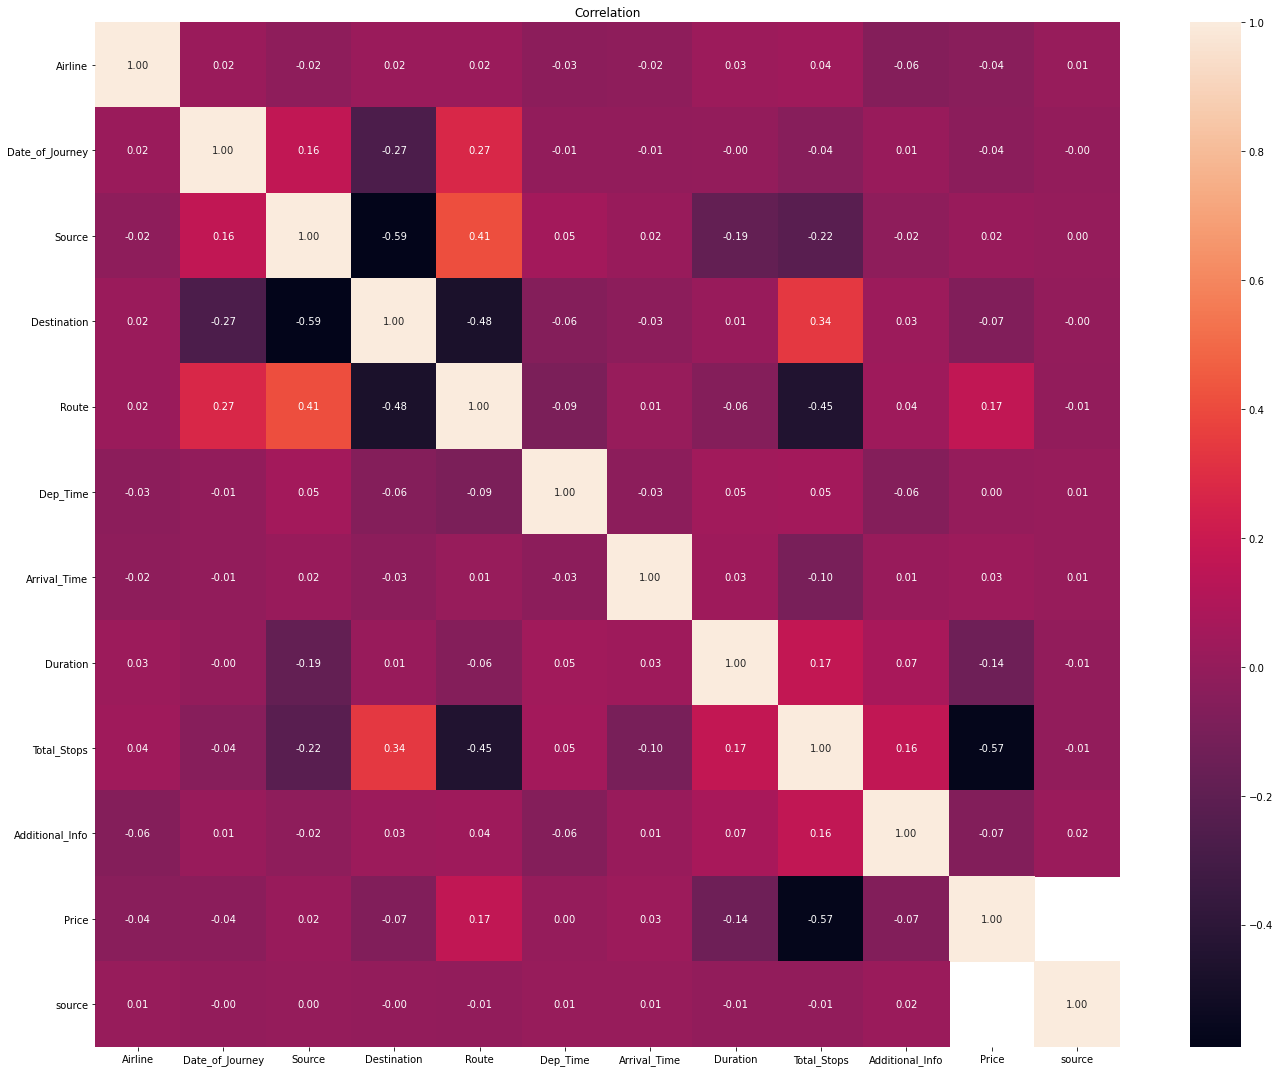

In [75]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True,cbar=True,square=True,fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

Observation from the above plot.

Max Correlation of the output with the features columns is Route.

Min Correlation of the output with the features columns is with Total_Stops.

Also we can see that there are not much corelation among the features.

In [157]:
#Now we will devide the dataset into train and test depending on the sources.
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,3,24,0,5,18,211,264,242,4,8,3897.0,0
1,1,6,3,0,87,31,986,342,1,8,7662.0,0
2,4,43,2,1,122,70,468,106,1,8,13882.0,0
3,3,10,3,0,95,164,1430,317,0,8,6218.0,0
4,3,0,0,5,29,149,1331,309,0,8,13302.0,0


In [12]:
train = df.loc[df['source'] == 0] #Since we used 0 for the train set.
train.drop(['source'], axis =1, inplace =True)

In [13]:
test = df.loc[df['source'] == 1] #Since we used 1 for the test set.
test.drop(['source'], axis =1, inplace =True)

In [69]:
test.drop(['Price'],axis = 1, inplace =True)

In [14]:
#Separating features and columns from the trained dataset.
x = train.drop(['Price'], axis =1)
y = train['Price']

**Removing Outliers**

In [15]:
#Let us now remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(x))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[0.41080484 0.02158081 1.65835945 ... 0.4119735  1.40720999 0.49992092]
 [1.26115217 1.43744594 0.89001433 ... 1.31534664 0.2537031  0.49992092]
 [0.01436882 1.5616646  0.04055641 ... 0.81661396 0.2537031  0.49992092]
 ...
 [0.01436882 0.42686602 1.65835945 ... 0.79139022 1.40720999 0.49992092]
 [2.56541078 1.92378819 1.65835945 ... 0.39390604 1.40720999 0.49992092]
 [1.26115217 1.48060756 0.04055641 ... 1.41471768 0.2537031  0.49992092]]

 Row Numbers ==> [  785  1043  2079  2405  2481  2495  2556  2924  3032  3111  3700  3788
  4521  5013  5372  5628  6024  6336  6576  7724  8957  9019  9656 10363
 10510]

 Column Numbers ==> [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


In [16]:
#Storing the zcore > 3 in i

i = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

x = x.drop(x.index[i])
y = y.drop(y.index[i])

In [18]:
#Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**Model Building**

In [84]:
#Importing Train Test Split to train and test the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 100)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [166]:
#Now Model Initiating and Training

In [21]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVR = SVR()

In [85]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
SVR.fit(x_train,y_train)
print("All Models Trained")

All Models Trained


In [86]:
#Prediction Scores for each trained model

In [118]:
LR.score(x_test,y_test)

0.4055220744224477

In [88]:
DT.score(x_test,y_test)

0.82013741145115

In [89]:
RF.score(x_test,y_test)

0.8750895485492513

In [90]:
SVR.score(x_test,y_test)

0.037875811220641764

With the above adjusted r2 score of all the models we see that RandomForestRegressor is giving us the best prediction.

In [91]:
#Now will check the mean squared error of each trained model.

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [93]:
y_pred1=LR.predict(x_test)
y_pred2 =DT.predict(x_test)
y_pred3=RF.predict(x_test)
y_pred4=SVR.predict(x_test)

In [94]:
mean_squared_error(y_test,y_pred1) # For the linear regression model

11462898.249140956

In [95]:
mean_squared_error(y_test,y_pred2) #For the Decision Tree Regressor Model

3468163.3457786115

In [96]:
mean_squared_error(y_test,y_pred3) # For the random forest regressor model

2408560.072004565

In [97]:
mean_squared_error(y_test,y_pred4) #For support vector regressor model.

18551961.653244466

**Cross Validation**

In [98]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

0.8654252760149717

**Since there is not much difference we can say the model is neither overfitting or underfitting**

**Using Test Set to predict the price**

In [99]:
Price = RF.predict(scaler.transform(test))

In [100]:
print(Price)

[14696.18  4239.81 12845.28 ... 15827.   13490.13  7462.62]


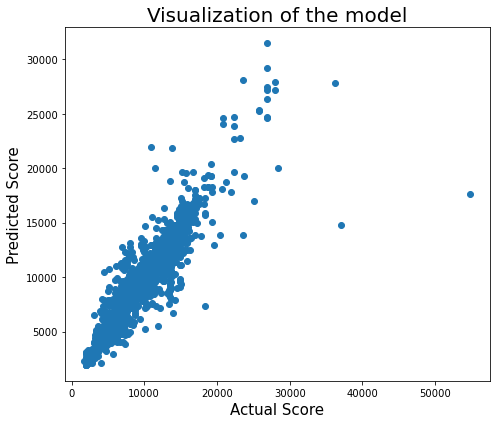

In [119]:
plt.figure(figsize = [7,6])
plt.scatter(y_test,y_pred3)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

**HyperParameter Tuning**

In [101]:
##Doing hyper parameter tuning for it

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
params = {'n_estimators':[140,120],
         'criterion':['mse','mae'],
         'max_depth':[18,20],
         'min_samples_leaf': [5,4],
         'min_samples_split': [4,6]}

In [104]:
grid = GridSearchCV(RF, param_grid= params, cv= 2, n_jobs=-1)

In [105]:
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [18, 20],
                         'min_samples_leaf': [5, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [140, 120]})

In [106]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'criterion': 'mse', 'max_depth': 18, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 120}


In [107]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [108]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=120)

In [109]:
y_pred =  clf.predict(x_test)

In [110]:
mean_squared_error(y_test,y_pred)

2835330.637904291

In [111]:
clf.score(x_test,y_test)

0.8529567794013928

In [112]:
mean_absolute_error(y_test,y_pred)

861.6685161406641

In [113]:
np.sqrt(mean_squared_error(y_test,y_pred))


1683.84400640448

In [114]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

0.8635165148423495

**Using Test Set to predict the price**

In [115]:
Price1 = clf.predict(scaler.transform(test)) 

In [116]:
print(Price1)

[14778.99240381  4293.14877708 12708.02421252 ... 16095.39683487
 12657.31911692  8248.47676258]


Predicted price using hyperparameter tuning

**Plotting the model on graph**

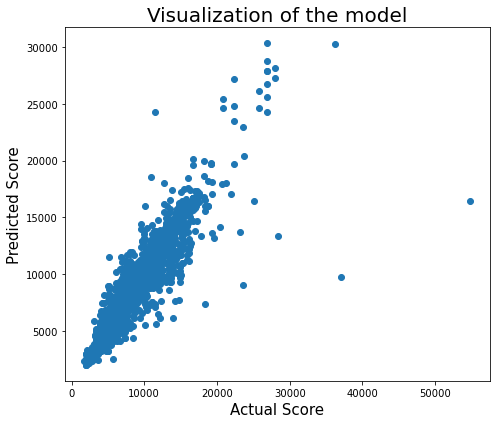

In [117]:
plt.figure(figsize = [7,6])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

**Model Saving**

In [81]:
import joblib

In [120]:
filename = 'Flight Price Prediction.sav' #Saving of best model
joblib.dump(RF, filename)

['Flight Price Prediction.sav']